# US Institutions Financial Report

In [2]:
# May need to install libraries directly in Jupyter notebook with the following commands
#! pip3 install --user pandas
#! pip3 install --user psycopg
#! pip3 install --user matplotlib
import pandas as pd
import psycopg
from matplotlib import pyplot as plt
from credentials import DBNAME, HOST, USERNAME, PASSWORD

In [3]:
# Parameters
YEAR = 2019


In [4]:
# Set the connection and grab the data from SQL
YEAR = str(YEAR) + '-01-01 00:00:00'

# Connect to the database using parameters from credentials.py
conn = psycopg.connect(
    dbname=DBNAME,
    host=HOST,
    user=USERNAME,
    password=PASSWORD)

# Create a cursor and use it to submit/execute a query:
cur = conn.cursor()

select_cmd = """
    SELECT * FROM institutions 
    WHERE extracted_year = %s;
"""

all_select_cmd = """
    SELECT * FROM institutions 
    WHERE extracted_year <= %s;
"""

# Save to a dataframe
df = pd.DataFrame(cur.execute(select_cmd, (YEAR,)))
all_df = pd.DataFrame(cur.execute(all_select_cmd, (YEAR,)))
colnames =['pkey', 'opeid', 'name', 'address', 'latitude',
            'longitude', 'fips', 'region', 'ccbasic', 'cbsa', 
            'csa', 'accreditor', 'pred_degree', 'highest_degree',
            'control', 'admission_rate', 'in_state_tuit', 'out_state_tuit',
            'prog_year_tuit', 'revenue_tuit', 'two_yr_default',
            'three_yr_default', 'avg_faculty_salary', 'sat_avg', 
            'prop_loan', 'extracted_year', 'zip', 'city', 'state']
df.columns = colnames
all_df.columns = colnames

# Close the connection
cur.close()
conn.close()

In [5]:
# Pandas style options
pd.set_option("display.precision", 2)

In [6]:
# Drop NAs from df and all_df
df = df.dropna(subset=['name', 'three_yr_default'])
all_df = all_df.dropna(subset=['name', 'three_yr_default'])

# Data Summary

Below is a data summary for the specified year, as well as the overall data.

In [7]:
selected_cols = ['admission_rate','in_state_tuit',
    'out_state_tuit', 'prog_year_tuit',
    'revenue_tuit', 'three_yr_default', 
    'avg_faculty_salary', 'sat_avg',
    'prop_loan']

# Extract specified year
yr = str.split(YEAR, "-")[0]

year_summary = df[selected_cols].describe()
full_summary = all_df[selected_cols].describe()
print("Full data summary")
display(full_summary)
print("Total amount of rows in the dataframe for 2019 to", (yr), "is", str(len(all_df)))
print("Total amount of columns in the dataframe for 2019 to", (yr), "is", str(len(all_df.columns)))

Full data summary


,admission_rate,in_state_tuit,out_state_tuit,prog_year_tuit,revenue_tuit,three_yr_default,avg_faculty_salary,sat_avg,prop_loan
count,1916.00,3296.00,3295.00,1799.00,5522.00,5542.00,3753.00,1308.00,5258.00
mean,0.68,16583.80,20021.16,17222.40,11736.27,0.11,7020.56,1141.18,0.51
std,0.21,14011.43,12768.12,7846.77,13432.98,0.08,2470.74,125.19,0.25
min,0.00,962.00,1080.00,585.00,0.00,0.00,500.00,785.00,0.00
25%,0.56,5390.25,9825.00,13625.00,5656.00,0.05,5369.00,1058.00,0.34
50%,0.70,12296.50,16557.00,15881.00,9932.50,0.09,6734.00,1123.50,0.55
75%,0.84,24750.00,27835.00,18367.50,14648.50,0.15,8333.00,1199.00,0.70
max,1.00,74514.00,74514.00,117450.00,455440.00,0.86,20483.00,1566.00,1.00


Total amount of rows in the dataframe for 2019 to 2019 is 5542
Total amount of columns in the dataframe for 2019 to 2019 is 29


# Summary of Current College Tuition Rates

In [7]:
print("Data Summary for", yr)
display(year_summary)
print("Total amount of rows in the dataframe for", (yr), "is", str(len(df)))
print("Total amount of columns in the dataframe for", (yr), "is", str(len(df.columns)))

Data Summary for 2019


,admission_rate,in_state_tuit,out_state_tuit,prog_year_tuit,revenue_tuit,three_yr_default,avg_faculty_salary,sat_avg,prop_loan
count,1916.00,3296.00,3295.00,1799.00,5522.00,5542.00,3753.00,1308.00,5258.00
mean,0.68,16583.80,20021.16,17222.40,11736.27,0.11,7020.56,1141.18,0.51
std,0.21,14011.43,12768.12,7846.77,13432.98,0.08,2470.74,125.19,0.25
min,0.00,962.00,1080.00,585.00,0.00,0.00,500.00,785.00,0.00
25%,0.56,5390.25,9825.00,13625.00,5656.00,0.05,5369.00,1058.00,0.34
50%,0.70,12296.50,16557.00,15881.00,9932.50,0.09,6734.00,1123.50,0.55
75%,0.84,24750.00,27835.00,18367.50,14648.50,0.15,8333.00,1199.00,0.70
max,1.00,74514.00,74514.00,117450.00,455440.00,0.86,20483.00,1566.00,1.00


Total amount of rows in the dataframe for 2019 is 5542
Total amount of columns in the dataframe for 2019 is 29


# Best and Worst Performing Institutions by Loan-Repayment Rates

We will sort our data by the three year default variable, which measures loan repayment rates. The best performing universities have the lowest default rates, and the worst have the highest rates. Below is a table displaying the best and worst performing institutions in the specified year.

In [8]:
# Extract the bottom 10 institutions
worst_performing = df.sort_values(by='three_yr_default').tail(10)

# Extract the top 10 institutions
best_performing = df.sort_values(by='three_yr_default').head(10)

best_performing_output = best_performing.loc[:, ['name', 'three_yr_default']]
worst_performing_output = worst_performing.loc[:, ['name', 'three_yr_default']]

# Extract specified year
yr = str.split(YEAR, "-")[0]

print("Top 10 Best-Performing Institutions in", yr)
display(best_performing_output)

print("\nBottom 10 Worst-Performing Institutions in", yr)
display(worst_performing_output)

Top 10 Best-Performing Institutions in 2019


,name,three_yr_default
1703,Paul Mitchell the School-Grand Rapids,0.0
6115,ZMS,0.0
6109,Westchester College of Nursing & Allied Health,0.0
6094,Atlantis University,0.0
4309,Cannella School of Hair Design-Blue Island,0.0
6086,California Intercontinental University,0.0
4897,Advanced College,0.0
3138,Westminster Theological Seminary,0.0
6076,High Tech High Graduate School of Education,0.0
5224,Ohio Medical Career College,0.0



Bottom 10 Worst-Performing Institutions in 2019


,name,three_yr_default
5752,Tomorrow's Image Barber And Beauty Academy of ...,0.59
5987,Vibe Barber College,0.59
6365,Bull City Durham Beauty and Barber College,0.59
5839,Ace Cosmetology and Barber Training Center,0.67
1238,Kansas Christian College,0.67
6237,Focus Personal Training Institute,0.67
6009,Barber Institute of Texas,0.67
6098,Salon Boutique Academy,0.67
6216,Garden State Science and Technology Institute,0.71
6219,Construction Training Center,0.86


In [9]:
# Can export to a PDF if desired
# OPTIONAL: don't need to run
# best_performing[['name', 'three_yr_default']].to_csv('data/best_performing_institutions.csv', index=False)
# worst_performing[['name', 'three_yr_default']].to_csv('data/worst_performing_institutions.csv', index=False)

# Tuition and Loan Repayment Rates

How have tuition rates and loan repayment rates changed over time for public, private for-profit, and private non-profit universities? Below, we have graphs displaying the change in average tuition rates and average loan repayment rates over time for the three different types of schools.

In [ ]:
# Brute force: go through each year and find average tuition for each type
# By changing specified year manually and finding the average tuition
# Then store in comments

# # Calculate average tuition for each year
# df['avg_tuition'] = (df['in_state_tuit'] + df['out_state_tuit']) / 2

# # Assuming you have a list of control types (e.g., 'Public', 'Private Non-Profit', 'Private For-Profit')
# control_types = ['Public', 'Private Non-Profit', 'Private For-Profit']

# # Calculate average tuition for each control type
# avg_tuition_by_control = df.groupby('control')['avg_tuition'].mean().loc[control_types]

# # Create a DataFrame to display the results
# avg_tuition_df = pd.DataFrame({'Control Type': avg_tuition_by_control.index, 'Average Tuition': avg_tuition_by_control.values})
# display(avg_tuition_df)

# RESULTS

# 2019 : 
#   Public - 9865.114776
#   Private non-Profit - 28631.045283
#   Private for-Profit - 16336.165198
# 2020 :
#   Public - 10000.060646
#   Private non-Profit - 29206.721009
#   Private for-Profit - 16224.248837
# 2021 :
#   Public - 10150.699133
#   Private non-Profit - 30036.095885
#   Private for-Profit - 16172.981735
# 2022:
#   Public - 10106.316838
#   Private non-Profit - 29750.997763
#   Private for-Profit - 16332.352505

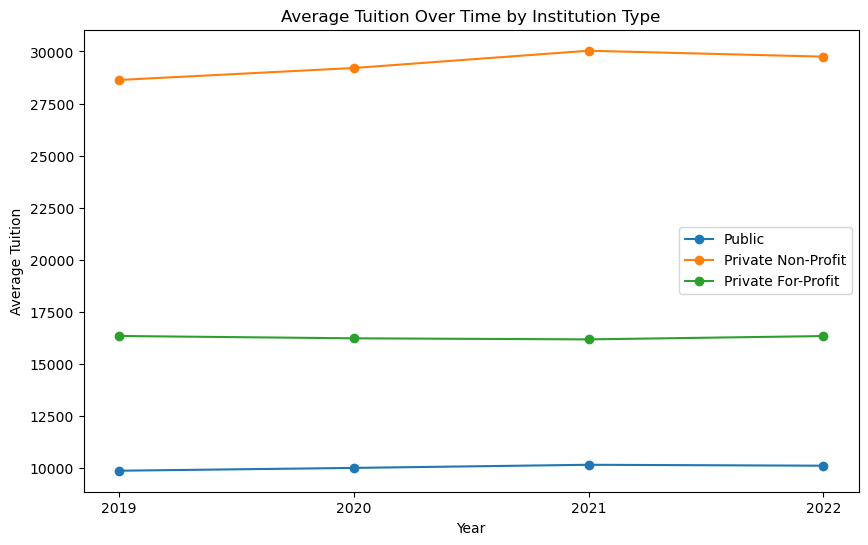

In [9]:
years = [2019, 2020, 2021, 2022]

public_tuition = [9865.114776, 10000.060646, 10150.699133, 10106.316838]
private_non_profit_tuition = [28631.045283, 29206.721009, 30036.095885, 29750.997763]
private_for_profit_tuition = [16336.165198, 16224.248837, 16172.981735, 16332.352505]

plt.figure(figsize=(10, 6))

plt.plot(years, public_tuition, label='Public', marker='o')
plt.plot(years, private_non_profit_tuition, label='Private Non-Profit', marker='o')
plt.plot(years, private_for_profit_tuition, label='Private For-Profit', marker='o')

plt.xticks(years)

plt.title('Average Tuition Over Time by Institution Type')
plt.xlabel('Year')
plt.ylabel('Average Tuition')
plt.legend()
plt.show()

# Relationship between average tuition and revenue tuition and SAT score

Are “smarter” colleges more expensive? Below, we have plots of the average tuition vs. SAT score as well as the revenue tuition vs. SAT score for institutions of the specified year.

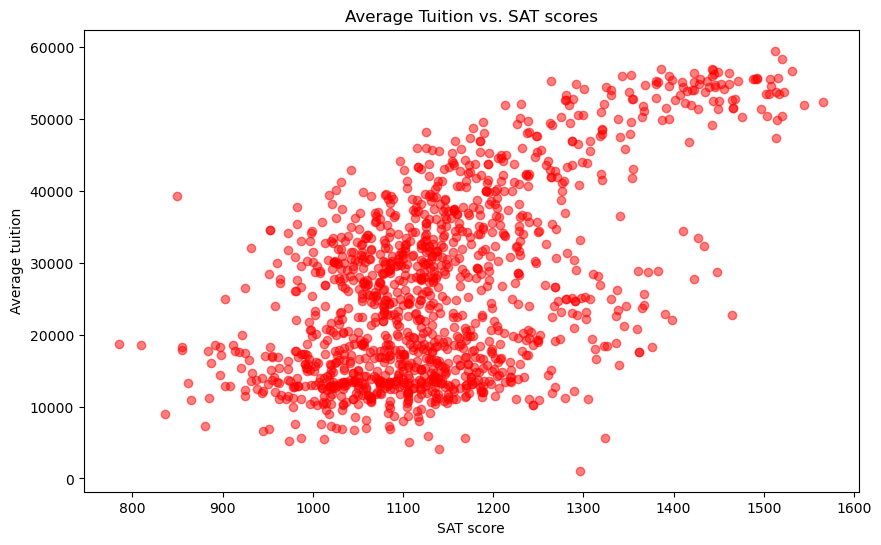

In [12]:
plt.figure(figsize=(10, 6))
plt.scatter(df['sat_avg'], df['avg_tuition'], color='red', alpha = 0.5)
plt.title('Average Tuition vs. SAT scores')
plt.xlabel('SAT score')
plt.ylabel('Average tuition')
plt.show()

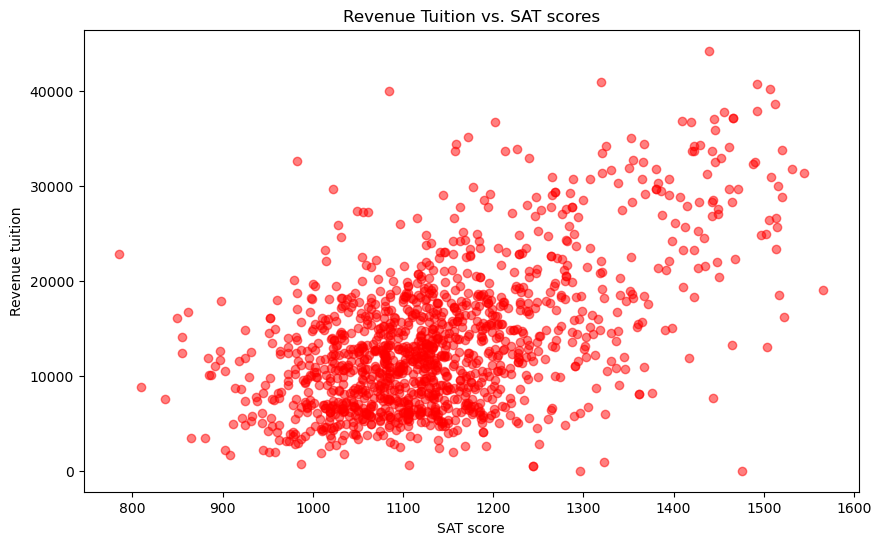

In [13]:
plt.figure(figsize=(10, 6))
plt.scatter(df['sat_avg'], df['revenue_tuit'], color='red', alpha = 0.5)
plt.title('Revenue Tuition vs. SAT scores')
plt.xlabel('SAT score')
plt.ylabel('Revenue tuition')
plt.show()

# SAT Scores and College Admission Rate

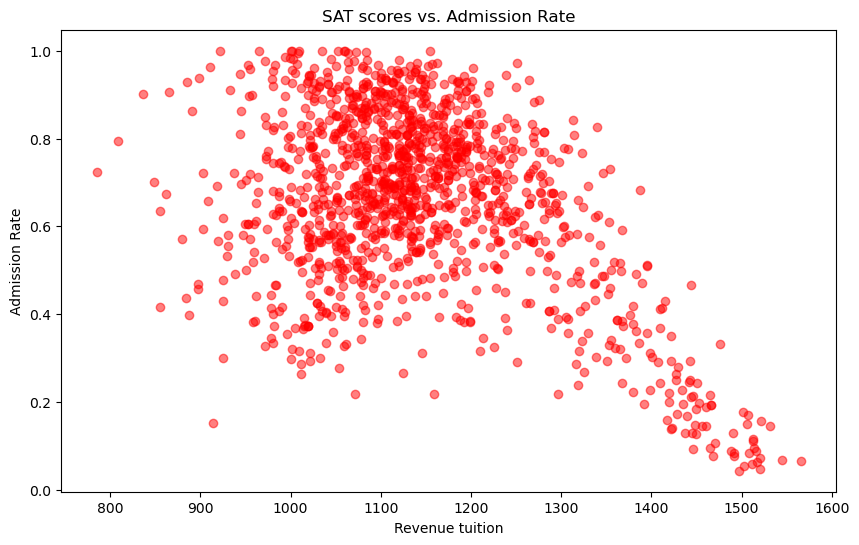

In [14]:
plt.figure(figsize=(10, 6))
plt.scatter(df['sat_avg'], df['admission_rate'], color='red', alpha = 0.5)
plt.title('SAT scores vs. Admission Rate')
plt.ylabel('Admission Rate')
plt.xlabel('Revenue tuition')
plt.show()

# Faculty Salary and Revenue Tuition

In below, we looked at the top 10 states that has the highest faculty salary and the relationship between faculty salary and revenue tuition for each universities. 

In [15]:
average_rev_tuit_by_state = pd.DataFrame(df.groupby('state')['revenue_tuit'].mean())
df_sorted_rev = df.sort_values(by='revenue_tuit', ascending=False)
top_10_rev = df_sorted_rev.head(10)

In [16]:
average_salary_fac = pd.DataFrame(df.groupby('state')['avg_faculty_salary'].mean())
df_sorted_fac = average_salary_fac.sort_values(by='avg_faculty_salary', ascending=False)
top_10_fac = df_sorted_fac.head(10)
display(top_10_fac)

,avg_faculty_salary
state,
RI,9523.07
CT,9188.64
MA,9007.90
DC,8797.20
NJ,8332.10
CA,8210.08
NY,8207.89
HI,8054.50
DE,7896.78


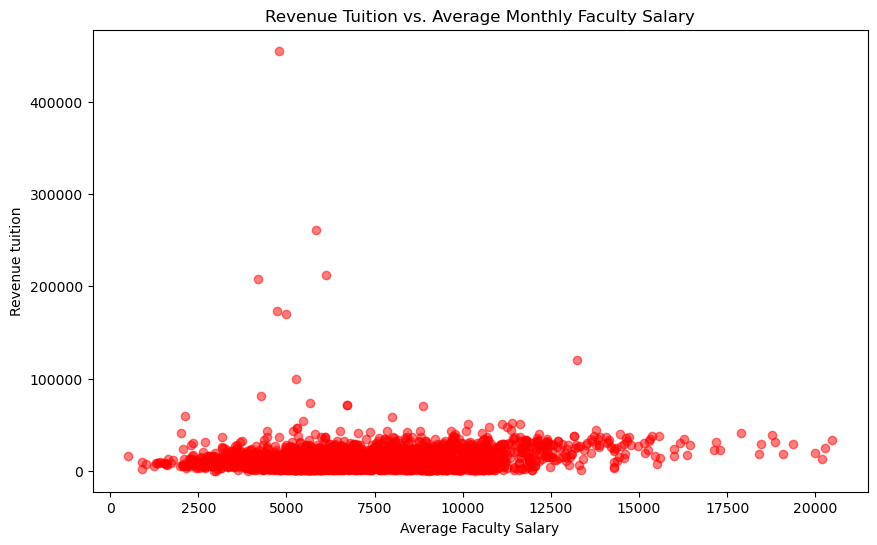

In [17]:
plt.figure(figsize=(10, 6))
plt.scatter(df['avg_faculty_salary'], df['revenue_tuit'], color='red', alpha = 0.5)
plt.title('Revenue Tuition vs. Average Monthly Faculty Salary')
plt.xlabel('Average Faculty Salary')
plt.ylabel('Revenue tuition')
plt.show()

This graph shows the relationship between average faculty salary and revenue tuition for each university, which will show the contrast between how much students pay and how much faculties get paid through the tuition each year. 

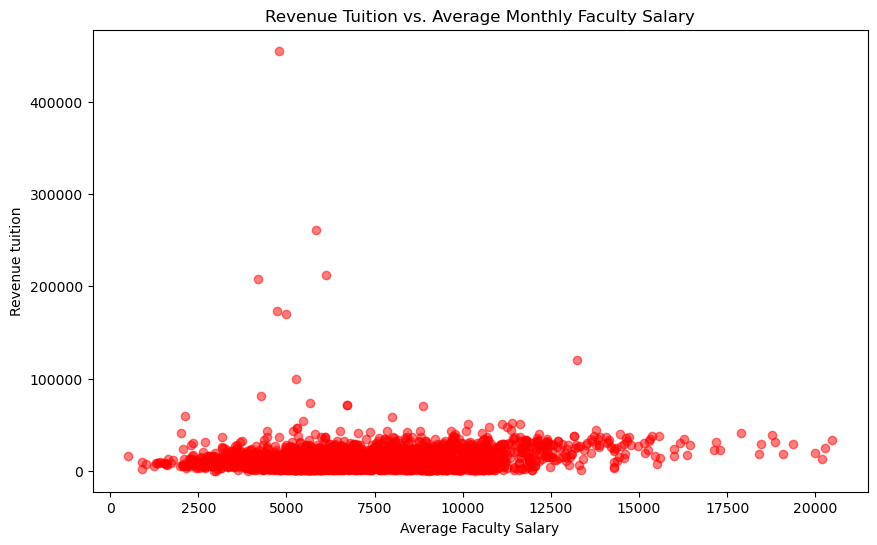

In [18]:
plt.figure(figsize=(10, 6))
plt.scatter(df['avg_faculty_salary'], df['revenue_tuit'], color='red', alpha = 0.5)
plt.title('Revenue Tuition vs. Average Monthly Faculty Salary')
plt.xlabel('Average Faculty Salary')
plt.ylabel('Revenue tuition')
plt.show()

We also seperated between public and private schools to see the difference between them. 

In [19]:
private_public = pd.DataFrame(df.groupby('control')['avg_faculty_salary'].mean())
display(private_public)

,avg_faculty_salary
control,
Private For-Profit,5034.91
Private Non-Profit,7209.24
Public,7682.70


<Figure size 1000x600 with 0 Axes>

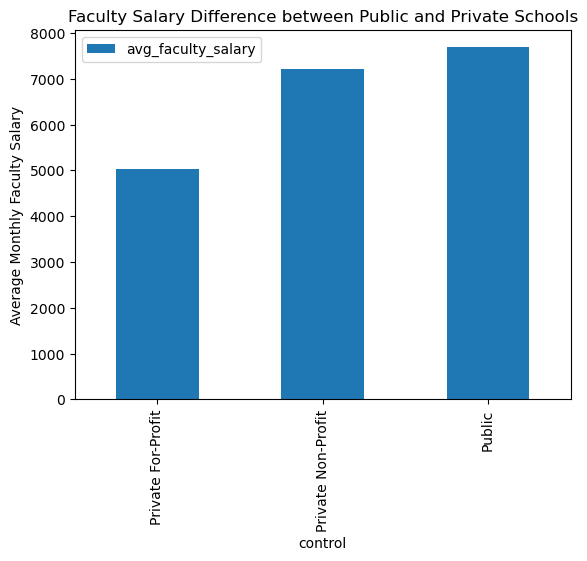

In [20]:
plt.figure(figsize=(10, 6))
private_public.plot(kind='bar')
plt.title('Faculty Salary Difference between Public and Private Schools')
plt.ylabel('Average Monthly Faculty Salary')
plt.show()